In [ ]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 100micro

In [ ]:
Adj(1e-9,45,100000)

(144, 1296000000)

In [ ]:
full_cycle = 11e-3
loop_number = 
part_cycle = full_cycle / loop_number
part_cycle

1.0999999999999999e-07

In [ ]:
interval = part_cycle * 1e6 #micro
interval

1375.0

In [ ]:
cycle_time = 11e-3
comp_time = cycle_time * 2
mod = 1/comp_time
mod

45.45454545454546

In [ ]:
samples = int(6048000000 * 1.1e-7)
samples

665

In [ ]:
samples/48

13.854166666666666

In [ ]:
sam = Granularity(samples)
sam

672

In [ ]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005

In [ ]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

In [ ]:
interval*10

5555.555555555556

In [ ]:
samples = int(3072000010 * (interval *1e-6))

In [ ]:
samples

1706666

In [ ]:
sam = Granularity(samples)

In [ ]:
sam

1706688

In [ ]:
sam/48

40000.0

In [ ]:
Granularity(samples)

1706688

In [ ]:
Sr = 3003004800
sam = 1668336

tim = sam/Sr

In [ ]:
tim

0.005555555555555556

In [ ]:
interval = tim*1e6 #micro

In [ ]:
interval

555.5555555555555

## 3 sappart 45 mod

In [ ]:
full_cycle = 11e-3
loop_number = 10
part_cycle = full_cycle / loop_number
part_cycle

1.375e-06

In [ ]:
interval = part_cycle * 1e6 #micro
interval

1375.0

In [ ]:
mod = 1/part_cycle
mod

45.45454545454546

In [ ]:
samples = int(2972160000 * part_cycle)
samples

4086

In [ ]:
samples/48

85.125

In [ ]:
sam = Granularity(samples)
sam

4128

# AWG and Pulse files setup

In [ ]:
AWG_Settings_100micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3003004800,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\100micro'
}

In [ ]:
M8190A = VisaR(AWG_Settings_100micro,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_100micro)

Instruments Sampling Frecuency set to 3.07200000000000E+09Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [ ]:
M8190A.write('FREQ:RAST 3003004800')

21

In [ ]:
Pump_100micro = {
    'Name':'Pump_100micro',
    'Amplitude': 50,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
ProbeA_100micro = {
    'Name':'ProbeA_100micro',
    'Amplitude':20,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [ ]:
ProbeB_100micro= {
    'Name':'ProbeB_100micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
PulseScheme_A_100micro =  {
    'Name' : 'PulseScheme_A_100micro',
    'Pulse Scheme': [Pump_100micro,ProbeA_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100micro'
}

In [ ]:
PulseScheme_B_100micro =  {
    'Name' : 'PulseScheme_B_100micro',
    'Pulse Scheme': [ProbeB_100micro,ProbeB_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100micro'
}

In [ ]:
interval*10

5555.555555555556

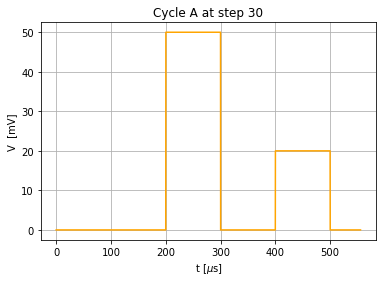

In [ ]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_100micro,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100micro  mod 90.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

In [ ]:
sam

1668336

In [ ]:
sweeping_run_a_100micro = Sweeping_Single_List_File_teil(PulseScheme_A_100micro,30,interval,sam,0,30,AWG_Settings_100micro,'A')[0]

In [ ]:
sweeping_run_b_100micro = Sweeping_Single_List_File_teil(PulseScheme_B_100micro,30,interval,sam,0,30,AWG_Settings_100micro,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_90Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100micro, k)


with open(r"{dict}\cycleB_31steps_90Hz_10micro_.p".format(dict = PulseScheme_B_100micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as j:
    sweeping_runa_100microicro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as f:
    sweeping_runb_100micro= pickle.load(f)

In [ ]:
sweeping_run_a_100micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_100micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
10

NameError: name 'loop' is not defined

In [ ]:
Sequence_File(M8190A,sweeping_run_a_100micro['Pulse File Location, at step 30'],sweeping_run_b_100micro['Pulse File Location, at step 30'],10)

Sequence loaded with the following segment data "1,10,0,1,0,1706687,2,10,0,1,0,1706687" and the advancement method is COND


0

# Loading

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '200 miliVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '90Hz'
}

In [ ]:
playingtime = 20

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_100micro,sweeping_run_b_100micro,PulseScheme_A_100micro['Measurement file Path'],Lock_In_Settings,10)

Sequence loaded with the following segment data "1,10,0,1,0,1668335,2,10,0,1,0,1668335" and the advancement method is COND
Average Value for measurement at step 0 is 0.333028274317168 V
Sequence loaded with the following segment data "1,10,0,1,0,1668335,2,10,0,1,0,1668335" and the advancement method is COND
Average Value for measurement at step 1 is 0.33358042067213145 V
Sequence loaded with the following segment data "1,10,0,1,0,1668335,2,10,0,1,0,1668335" and the advancement method is COND
Average Value for measurement at step 2 is 0.3295996315045213 V
Sequence loaded with the following segment data "1,10,0,1,0,1668335,2,10,0,1,0,1668335" and the advancement method is COND
Average Value for measurement at step 3 is 0.33368628048287424 V
Sequence loaded with the following segment data "1,10,0,1,0,1668335,2,10,0,1,0,1668335" and the advancement method is COND
Average Value for measurement at step 4 is 0.33398366297733434 V
Sequence loaded with the following segment data "1,10,0,1,0,166

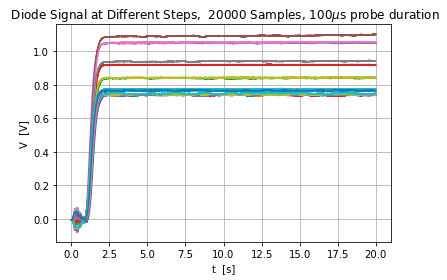

NameError: name 'PulseScheme_A_100micro' is not defined

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 100$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 100 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-200,200,31)

In [ ]:
%matplotlib inline

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …